In [1]:
import graphlab
import re
import seaborn as sns
import matplotlib.pyplot as plt
# mpl.use('Agg')
import numpy as np
%matplotlib inline

A newer version of GraphLab Create (v2.1) is available! Your current version is v1.9.

You can use pip to upgrade the graphlab-create package. For more information see https://dato.com/products/create/upgrade.


In [2]:
img_data = graphlab.SFrame.read_csv('img_datas.txt', delimiter='\t', header=False)

This non-commercial license of GraphLab Create for academic use is assigned to guoxiuhe@nefu.edu.cn and will expire on April 02, 2017.


2016-08-19 10:18:32,869 [INFO] graphlab.cython.cy_server, 176: GraphLab Create v1.9 started. Logging: C:\Users\heguoxiu\AppData\Local\Temp\graphlab_server_1471573103.log.0


Finished parsing file E:\Python\0MyProjectLab\img_datas.txt

Parsing completed. Parsed 100 lines in 0.35202 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file E:\Python\0MyProjectLab\img_datas.txt

Parsing completed. Parsed 85460 lines in 0.131007 secs.

In [3]:
def get_year(date):
    year = re.split('[\s\-]', date)[0]
    return year

In [4]:
img_data['X3'] = img_data['X3'].apply(get_year)

In [5]:
#img_data.save('img_user_year.csv', format='csv')

In [6]:
stat = img_data.groupby(key_columns=['X2', 'X3'], operations={'count': graphlab.aggregate.COUNT()})

In [7]:
stat = stat.sort(['X2', 'X3'])

In [8]:
stat['year'] = stat['X3']
stat.remove_column('X3')

X2,count,year
124327652@N02,1,1857
124327652@N02,4,1860
124327652@N02,1,1865
124327652@N02,4,1870
124327652@N02,1,1875
124327652@N02,1,1876
124327652@N02,1,1877
124327652@N02,1,1880
124327652@N02,10,1885
124327652@N02,1,1888


In [9]:
stat.rename({'X2':'user'})

user,count,year
124327652@N02,1,1857
124327652@N02,4,1860
124327652@N02,1,1865
124327652@N02,4,1870
124327652@N02,1,1875
124327652@N02,1,1876
124327652@N02,1,1877
124327652@N02,1,1880
124327652@N02,10,1885
124327652@N02,1,1888


In [10]:
stat_1799 = stat[stat['year']>='1799']

In [11]:
palette = np.array(sns.color_palette("hls", n_colors=29))

In [12]:
national_library = ['47756470@N03','48220291@N04','95520404@N07','67193564@N03','45270502@N06'
                    ,'47290943@N03','14456531@N07','32741315@N06','37199428@N06']#,'8623220@N02'

In [13]:
public_library = ['133323184@N07','124327652@N02','94268151@N07','26491575@N05','99915476@N04','37381115@N04','36038586@N04','32605636@N06','32951986@N05','30194653@N06','29454428@N08']

In [14]:
University_library = ['132445284@N06','31033598@N03','95717549@N07','30515687@N05','41131493@N06','8337233@N06','35128489@N07']

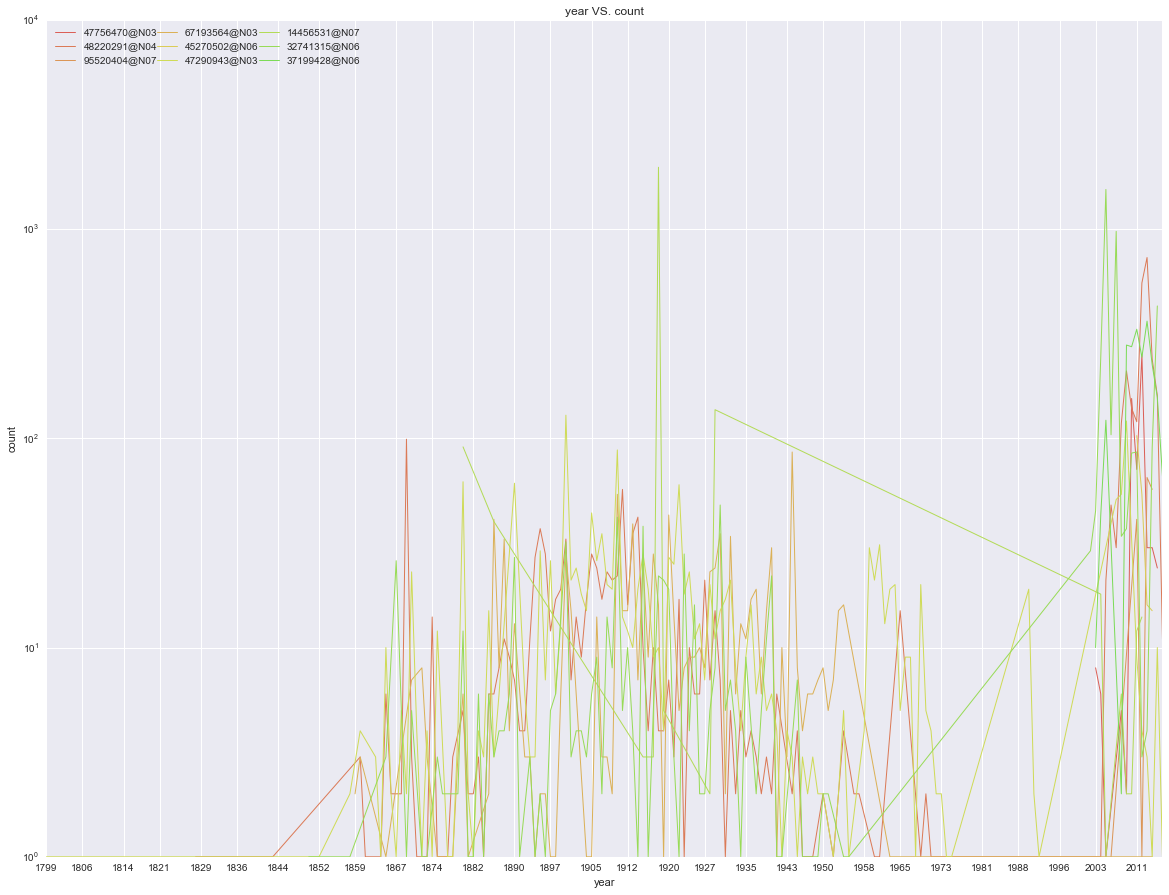

In [57]:
plt.figure(figsize=(20,15), dpi=100, facecolor="white")
ax=plt.gca()
ax.set_xticks(np.linspace(1799,2019,30,dtype=int))
# ax.set_yticklabels(('0','10','50','100','500','1000','2000','5000','9000'))
# ax.set_yticks(np.linspace(0,7000,3))
i = 0
for user in national_library:
# for user in stat['user'].unique():
    try:
        a = stat_1799[stat_1799['user'] == user]
        plt.plot(a['year'], a['count'], color=palette[i], linestyle="-", linewidth=1, label=user)
        i += 1
    except:
        continue
plt.title('year VS. count')
plt.xlabel('year')
plt.ylabel('count')
plt.rcParams.update({'font.size': 10.5})
plt.legend(loc='upper left', ncol=3, columnspacing=0.001, prop={'size':10})
plt.yscale('log')
# plt.savefig('a.png', dpi=200)